In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import and check data

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df.shape

(134, 5)

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


# Do scatter plot and linregress

- End year should be 2050 for the lingress

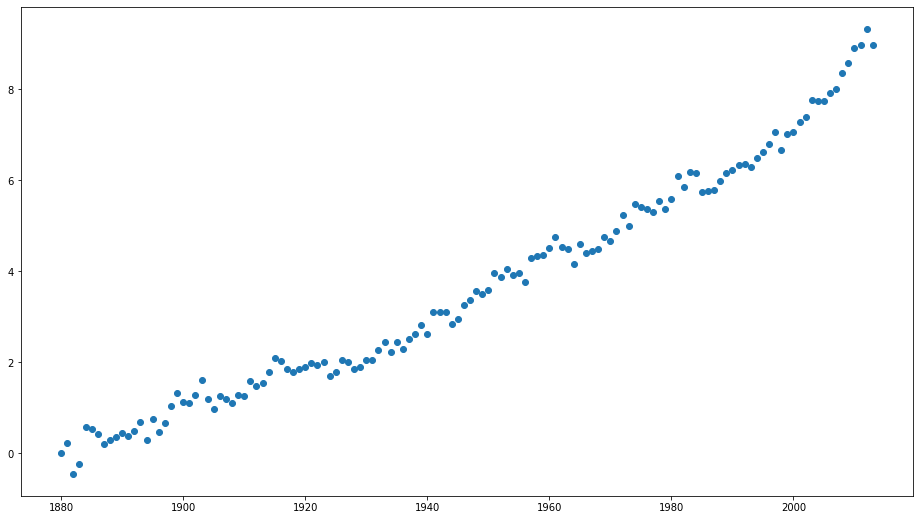

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

After seeing the scatter plot, we can observe that from 1880 to 2000 there was a clear line, but, in the last 2000 the slope increased. To confirm this, we will use linregress method to get the best fit for our data, them plot it within the scatter plot and see how they fit.

<Figure size 1080x576 with 0 Axes>

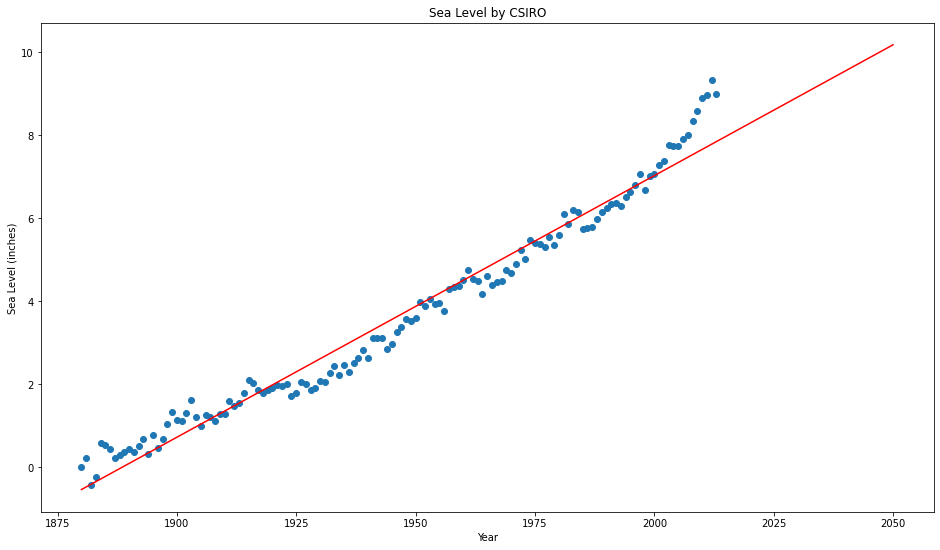

<Figure size 1080x576 with 0 Axes>

In [5]:
lin_reg = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
years = np.arange(1880,2051)
line1 = lin_reg.intercept + lin_reg.slope * years
    
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(years, line1, color= 'red')
plt.title('Sea Level by CSIRO')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.figure(figsize = (15,8))

It is clear that our first hypothesis was right, as we can see that the extrapolation to 2500 will be not matching the real Sea Level. So, we will use just the late 2000 data and redo the linear regression to see if we can get a better prediction. 

- The prediction to year 2500 with the actual data is 10 inches.

In [6]:
df_last = df[df['Year']>=2000]
lin_reg_2000 = linregress(x=df_last['Year'], y=df_last['CSIRO Adjusted Sea Level'])

<Figure size 1080x576 with 0 Axes>

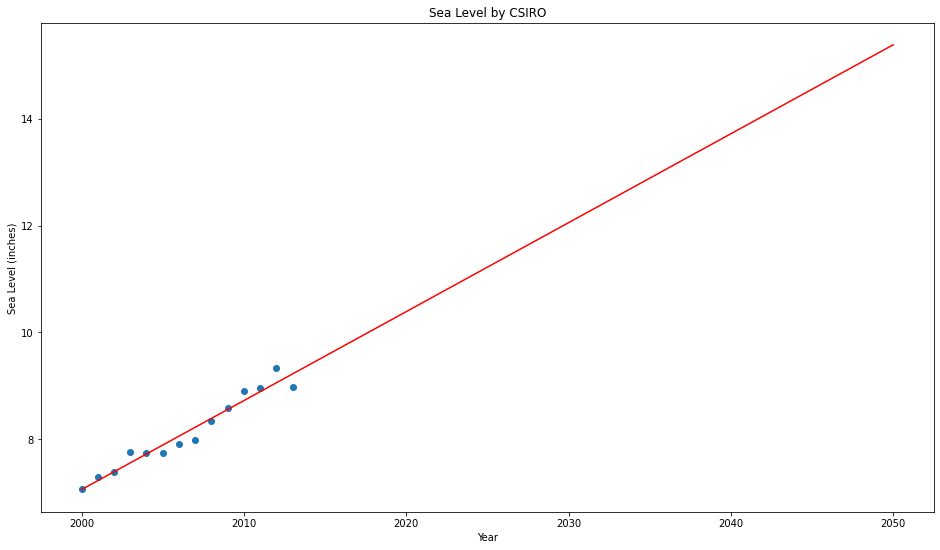

<Figure size 1080x576 with 0 Axes>

In [7]:
years = np.arange(2000,2051)
line2 = lin_reg_2000.intercept + lin_reg_2000.slope * years
    
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(df_last['Year'],df_last['CSIRO Adjusted Sea Level'])
plt.plot(years, line2, color= 'red')
plt.title('Sea Level by CSIRO')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.figure(figsize = (15,8))

In [9]:
value_2050_1 = lin_reg_2000.intercept + lin_reg_2000.slope*2050
value_2050_2 = lin_reg.intercept + lin_reg.slope * 2050
print(value_2050_1)
print(value_2050_2)

15.382443524364874
10.175455257136548


Confirming the previous hypothesis, the first predicted value fr the sea level was 10.17 inches, wich is way lower than the newer predicted value of 15.38 inches. So, even if the first line seemed the best fit, the data wasn't good enough for a linaer fit.